In [1]:
from grid1D import Grid1D
import numpy as np

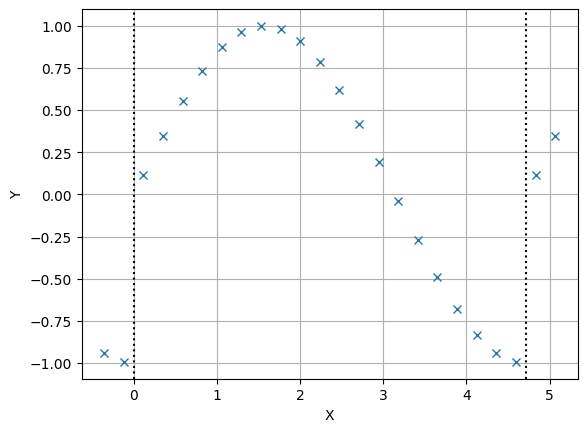

0.0


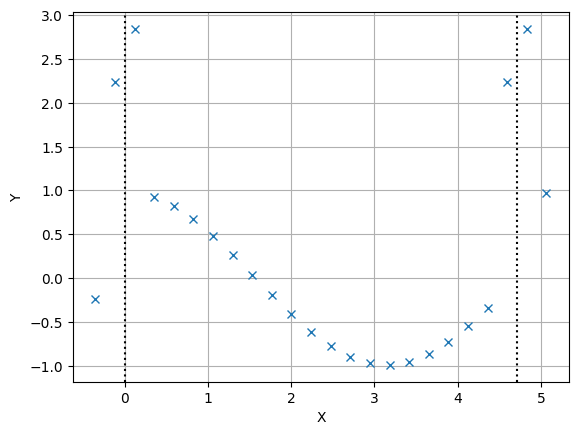

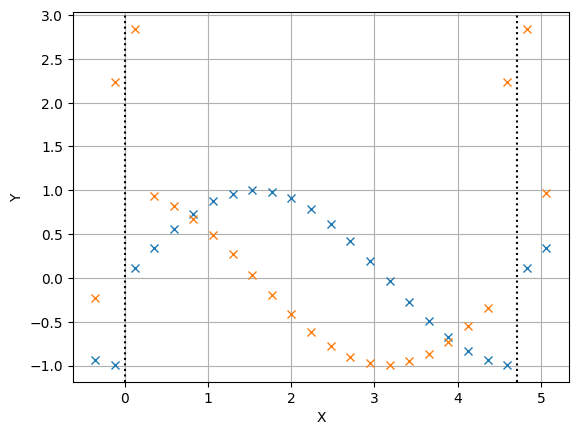

In [2]:
my_grid = Grid1D(20, (0, 1.5*np.pi), 2)
my_grid.calc_f(np.sin, "periodic")
my_grid.plot()
d_dx = my_grid.derivative(method="numpy")
d_dx2 = my_grid.derivative(method="center")

# check if both methods yield the same result
print(np.max(np.abs(d_dx.f-d_dx2.f)))

# plot the gradient
d_dx.plot()

# plot both together
my_grid.plot(extra_grids=[d_dx])

# Exercise 2 Euler Method
## 1. analytical solution
$$\frac{d}{dt}u(t) = -(t-a)u(t), \quad u(0) = C$$
$$\int \frac{1}{u}du = \int -(t-a) dt$$
$$\ln{u} = - \frac{t^2}{2} + at + \tilde{C}$$
$$u(t) = \exp{(- \frac{t^2}{2} + at)} C$$

## 2. solve with Euler

In [3]:
def solve(self, dt):
        """
        :param dt: step size
        """
        # time array
        T = np.arange(self.t0, self.t_end + dt, dt)
        # iteration process
        u = np.empty_like(T)
        u[0] = self.u0
        for n in range(1, len(T)):
            tn = T[n-1]
            u[n] = dt * self.f(tn, u[n-1]) + u[n-1]
        return u, T

## 3. plot analytical vs numerical

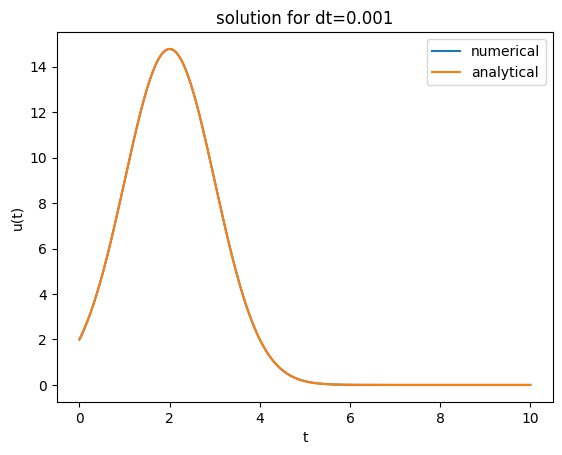

In [4]:
from euler_solver import EulerSolver
import numpy as np

a = 2
C = 2
t0 = 0
t_end = 10

f = lambda t, u: -(t - a) * u

u_analytical = lambda T: C * np.exp(-0.5 * T**2 + a * T)

solver = EulerSolver(f, C, t0, t_end)

dt = 1e-3
u_num, T = solver.solve(dt)
u_ana = u_analytical(T)
solver.plot(T, u_num, u_ana, dt)

## 4. convergence test 

In [5]:
p_conv = solver.convergence_test(dt, u_ana)
p_self = solver.self_convergence_test(dt)

print(f"order of convergence p = {p_conv} \\ order of self convergence p_self = {p_self} ")


order of convergence p = 0.9735543898086563 \ order of self convergence p_self = 0.9599956339107333 


# Exercise 3 relaxation method

## 1. analytical solution

$$ u''(x) = \cos(x) \quad \Rightarrow \quad u(x) = - \cos(x) + x c_1 + c_2 $$
$$ u(0) = -1 + c_2 \overset{!}{=} -2 \quad \Rightarrow \quad c_2 = -1$$
$$ u(3 \pi) = 1 + 3 \pi c_1 -1 \quad \Rightarrow \quad c_1 = \frac{2}{3 \pi}$$
$$ u_a(x) = - \cos(x) + \frac{2 \pi}{3}x -1$$

## 2. solving numerical

In [6]:
def euler_rhs(self, t, u):
        self.grid.f = u
        Lu = self.grid.second_derivative()
        f_x = self.func(self.grid.xs)
        du_dt = np.zeros_like(u)
        du_dt[1:-1] = Lu - f_x[1:-1]

        # fix boundary conditions
        du_dt[0] = 0
        du_dt[-1] = 0
        return du_dt
    
def solve(self, dt):
    u0 = np.linspace(self.u_left, self.u_right, len(self.grid.xs))
    solver = EulerSolver(self.euler_rhs, u0, self.t0, self.t_end)

    u_num, T = solver.solve(dt)

    return u_num, T

## 3. plot numerical vs. analytical solution

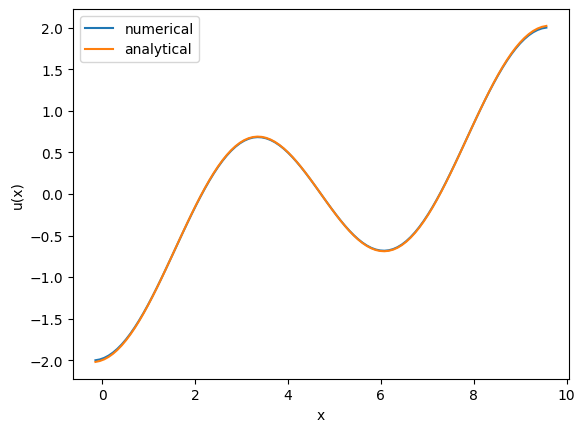

In [ ]:
from relaxation_solver import RelaxationSolver
# define parameters
func = lambda x: np.cos(x)
dt = 1e-3
boundaries = (-2, 2)
t0 = 0
t_end = 20

relax_grid = Grid1D(100, (0, 3* np.pi))
solver = RelaxationSolver(relax_grid, func, dt, boundaries, t0, t_end)
X = relax_grid.xs
u_num, T = solver.solve(dt)
u_ana = solver.analytical(X)
solver.plot(X, u_num, u_ana)